<a href="https://colab.research.google.com/github/guidolabela/POS_IA/blob/Modelos_Estatisticos/Projeto_Regressao_Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # para analises graficas
import statsmodels.api as sm # para fazer os modelos
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')


importando o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cerveja = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/POS_IA/Modelos Estatisticos/Consumo_cerveja_1.csv')
#cerveja = pd.read_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/POS_IA/Modelos Estatisticos/Consumo_cerveja_1.csv'))

In [ ]:
cerveja.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [ ]:
cerveja.tail() #ultimas 5 linhas

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
360,27/12/2015,24.00,21.1,28.2,13.6,1,32.307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26.095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22.309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20.467
364,31/12/2015,24.76,20.2,29.0,0.0,0,22.446


In [ ]:
cerveja.shape #verifica periodo de amostra de dados

(365, 7)

In [ ]:
cerveja.isna().sum() # verificando se há valores ausentes

,0
Data,0
Temperatura_Media,0
Temperatura_Minima,0
Temperatura_Maxima,0
Precipitacao,0
Final_de_Semana,0
Consumo,0


In [ ]:
cerveja.dtypes

,0
Data,object
Temperatura_Media,float64
Temperatura_Minima,float64
Temperatura_Maxima,float64
Precipitacao,float64
Final_de_Semana,int64
Consumo,float64


Tabela descritiva das variaveis

In [ ]:
cerveja.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


from matplotlib import pyplot as plt
_df_0['Temperatura_Media'].plot(kind='hist', bins=20, title='Temperatura_Media')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Temperatura_Minima'].plot(kind='hist', bins=20, title='Temperatura_Minima')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Temperatura_Maxima'].plot(kind='hist', bins=20, title='Temperatura_Maxima')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Precipitacao'].plot(kind='hist', bins=20, title='Precipitacao')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Temperatura_Media', y='Temperatura_Minima', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Temperatura_Minima', y='Temperatura_Maxima', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Temperatura_Maxima', y='Precipitacao', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Precipitacao', y='Final_de_Semana', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Temperatura_Media'].plot(kind='line', figsize=(8, 4), title='Temperatura_Media')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Temperatura_Minima'].plot(kind='line', figsize=(8, 4), title='Temperatura_Minima')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Temperatura_Maxima'].plot(kind='line', figsize=(8, 4), title='Temperatura_Maxima')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Precipitacao'].plot(kind='line', figsize=(8, 4), title='Precipitacao')
plt.gca().spines[['top', 'right']].set_visible(False)

Gráfico Correlograma

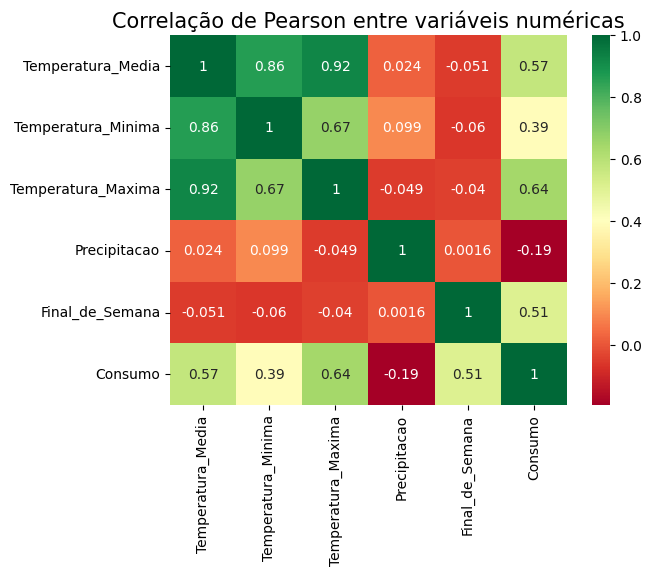

In [ ]:
#plt.figure(figsize=(20,8))
#sns.heatmap(cerveja.corr(),annot=True,cmap="RdYlGn");
#plt.title('Correlação entre as variáveis - Pearson', size=15);

#separando as variaveis numericas
numericas = cerveja.select_dtypes(include='number')
corr_pearson = numericas.corr(method='pearson')
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn')
plt.title('Correlação de Pearson entre variáveis numéricas', size=15)
plt.show()

Boxplot

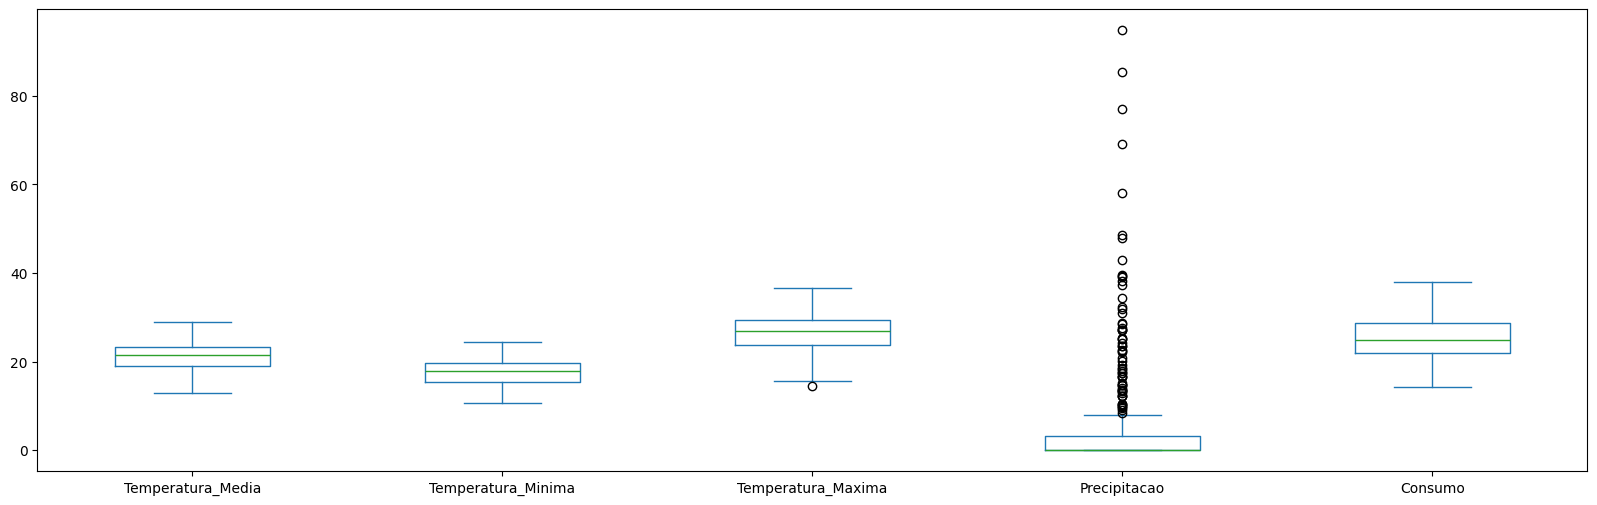

In [ ]:
#atraves de instrução veremos os outliers em Precipitação >> Analise: Em média não choveu muito mas teve alguns dias que chuveram muito
cerveja[['Temperatura_Media','Temperatura_Minima','Temperatura_Maxima','Precipitacao','Consumo']].plot.box(figsize=(20,6));
#

Distriuição das variáveis

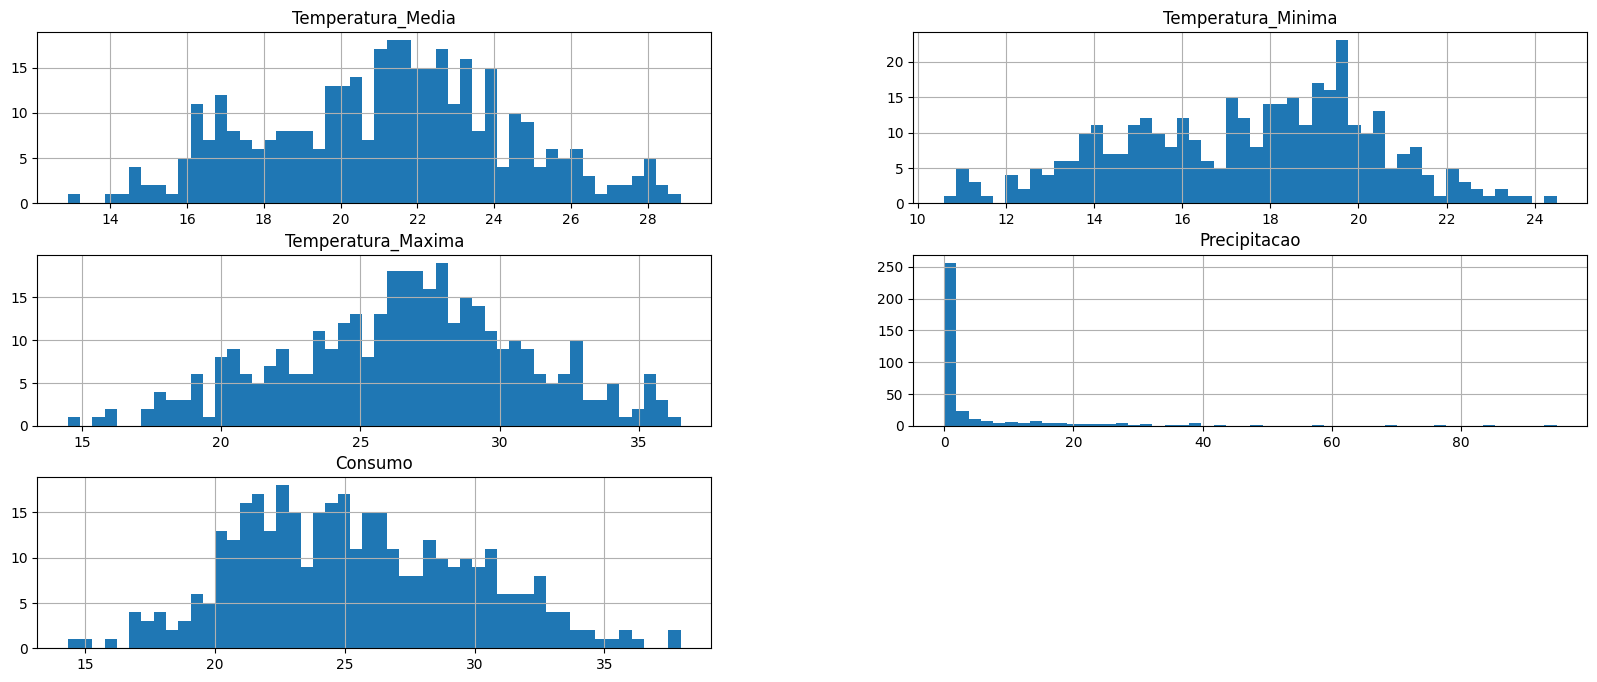

In [ ]:
cerveja[['Temperatura_Media','Temperatura_Minima','Temperatura_Maxima','Precipitacao','Consumo']].hist(figsize=(20,8),bins=50);

<Axes: xlabel='Consumo', ylabel='Precipitacao'>

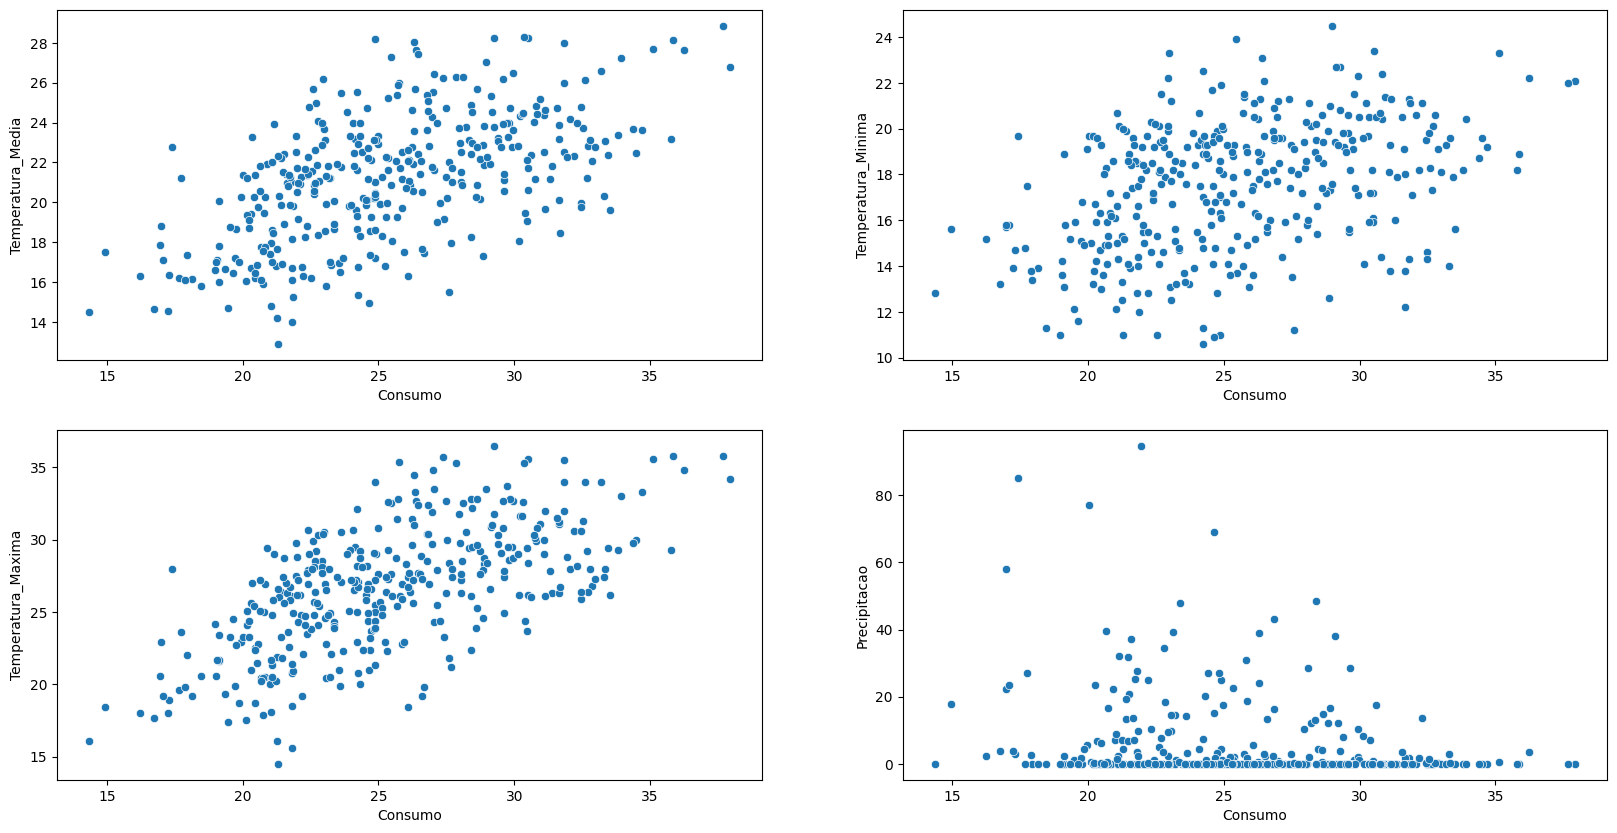

In [ ]:
#Verificando a correlação pelo Consumo
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(x='Consumo',y='Temperatura_Media',data=cerveja,ax=ax[0,0]) #Correlacao razoavel
sns.scatterplot(x='Consumo',y='Temperatura_Minima',data=cerveja,ax=ax[0,1]) #Correlacao dispersa
sns.scatterplot(x='Consumo',y='Temperatura_Maxima',data=cerveja,ax=ax[1,0]) #Correlacao boa
sns.scatterplot(x='Consumo',y='Precipitacao',data=cerveja,ax=ax[1,1]) #Sem correlacao

In [ ]:
#Variaveis independentes
X = cerveja.drop(['Consumo','Data'],axis=1) #Retirando consumo e data
#Variavel dependente
y = cerveja['Consumo']

In [ ]:
modelo1 = sm.OLS(y,sm.add_constant(X)).fit() #OLS cria o modelo linear
modelo1.summary(title='Sumário do modelo')

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Sumário do modelo                               
==============================================================================
Dep. Variable:                Consumo   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           1.19e-97
Time:                        21:21:09   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.4447      0.845      7.627      0.000       4.783       8.107
Temperatura_Media      0.0308      0.188      0.164      0.870      -0.339       0.401
Temperatura_Minima    -0.0190      0.110     -0.172      0.863      -0.236       0.198
Temperatura_Maxima     0.6560      0.095      6.895      0.000       0.469       0.843
Precipitacao          -0.0575      0.010     -5.726      0.000      -0.077      -0.038
Final_de_Semana        5.1832      0.271     19.126      0.000       4.650       5.716
==============================================================================
Omnibus:                       39.362   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.936
Skew:                           0.153   Prob(JB):                      0.00155
Kurtosis:                       2.130   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analise do Sumary
- O modelo conseguiu explicar 72% da variailidade dos dados. Como estamos testando com regressão multipla, tem que olhar o R2 ajustado >> Expressa 71,9%
Pela Estatistica F temos um modelo significativo

const (Beta 0) as demais (Beta 1, Beta 2, Beta 3, Beta 4, Beta 5)
Pelo p-valor a temperatura média e minima não foram significativas, possivelmente poderemos retirar

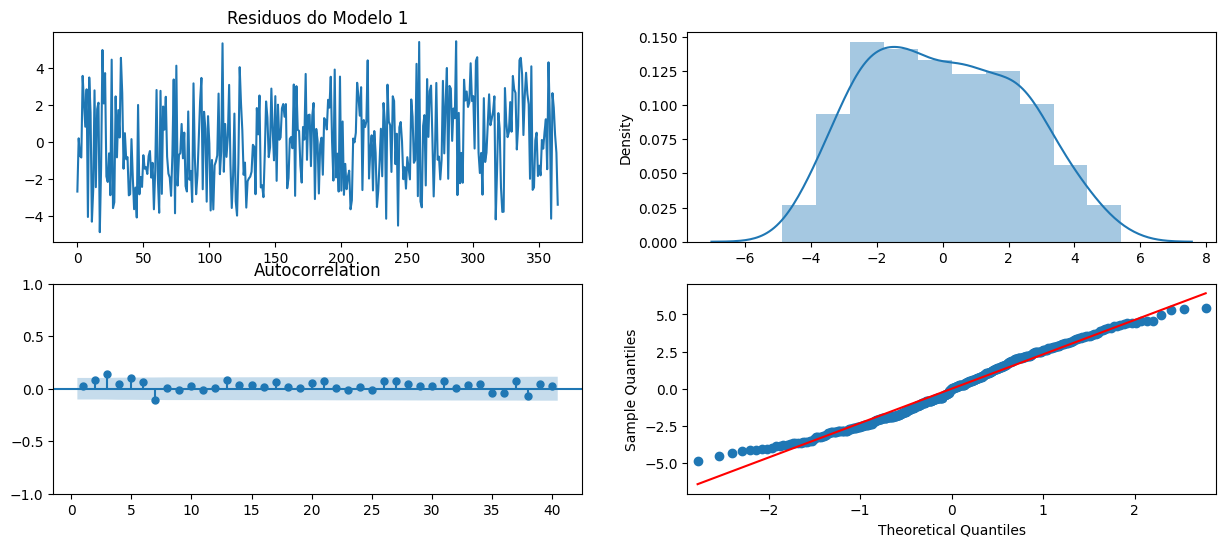

In [ ]:
#Finalizando com uma analise gráfica
residuos1 = modelo1.resid
fig, ax = plt.subplots(2,2,figsize=(15,6))
residuos1.plot(title="Residuos do Modelo 1",ax=ax[0][0])
sns.distplot(residuos1,ax=ax[0,1])
plot_acf(residuos1,lags=40,zero=False,ax=ax[1,0])
qqplot(residuos1,line='s',ax=ax[1,1]);

#Analise.
#Primeiro grafico: residuos aleatorios proximo a zero
#Terceiro grafico: grafico de autocorrelação (o primeiro esta fora) a maioria estao dentro de um intervalo
#Quarto grafico: residuos fogem um pouco  proximo a zero